<a href="https://colab.research.google.com/github/EVA5-Stars/EVA5/blob/master/S6/EVA5_Submission_Session_6_in_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Objective take best 5th code, and run below versions for 25 epochs and report findings:

>> 1. with L1 + BN
2. with L2 + BN
3. with L1 and L2 with BN
4. with GBN
5. with L1 and L2 with GBN


* *You need to write a single loop or iterator to iterate through these conditions.*

* Draw ONE graph to show the validation accuracy curves for all 5 jobs above. This graph must have proper legends and it should be clear what we are looking at.

* Draw ONE graph to show the loss change curves for all 5 jobs above. This graph must have proper legends and it should be clear what we are looking at.

* Find any 25 misclassified images (combined into single image) for "with GBN" model. You should be using the saved model from the above jobs.  You MUST show the actual and predicted class names.

Submitted By: 
* Gaurav Makkar
* Mohit Bhandari
* Suman Debnath
* Sriram Iyengar




## Import `pytorch` libraries and modules:

In [1]:
from __future__ import print_function
import torch
#import nueral net model in the torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#torchvision is the libraray in torch that has many features
#and we are using datasets and transforms from this library 
from torchvision import datasets, transforms

In [2]:
!rm -rf EVA5
!git clone https://github.com/EVA5-Stars/EVA5.git

Cloning into 'EVA5'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 146 (delta 80), reused 85 (delta 39), pack-reused 0
Receiving objects: 100% (146/146), 537.41 KiB | 760.00 KiB/s, done.
Resolving deltas: 100% (80/80), done.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls /content/gdrive/My\ Drive/Colab\ Notebooks/EVA5/S6

Mounted at /content/gdrive
EVA5_Submission_Session_6_inprogress.ipynb
EVA5:Submission-Session_6_Model-BatchNormalization.pt
EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt
L1EVA5:Submission-Session_6_Model-BatchNormalization.pt
L1EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt


In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## Project Library:

*   Ghost Batch Normalization
*   Misclassified image collection
*   Load the testing and training data with configurabe *batch_size*
*   Plot the Loss and Accuracy Graph
*   Define the structure of the network
*   Setup to create model and summary
*   Load the testing and training data with configurabe *batch_size*
*   Define test and train functions
*   Create a function to *initiate_training* for all conditions





**Ghost Batch Normalization**: 

A technique originally developed for training with very large batch sizes across many accelerators. 

In [6]:
#from EVA5.S6.BatchNorm_GhostBatchNorm import GhostBatchNorm
#from EVA5.S6.BatchNorm_GhostBatchNorm import BatchNorm

**Collecting Misclassified Images**

In [7]:
#from S6.S6_plot_misclassfied_image_finder import misclassified_image_finder              
def misclassified_image_finder(model, model_path, device, train_loader, image_num, msg):
    
    data_iter = iter(test_loader)
    figure = plt.figure()

    plt.title('Misclassified Images: With {}'.format(msg))
   
    for _i in range(image_num):
          data, target = data_iter.next()

          model.load_state_dict(torch.load(model_path)) 
          model.eval()

          data, target = data.to(device), target.to(device)

          output = model(data)
          pred = output.argmax(dim=1, keepdim=True) 

          for a in range(256):
              if(pred[a]!=target[a]):
                  
                  plt.subplot(5,5,_i+1)
                  plt.axis('off')
                  plt.imshow(data[a].cpu().numpy().squeeze(),cmap='gray_r')

Plot the Loss and Accuracy Graph

In [8]:
from EVA5.S6.S6_plot_stat_loss_acc import plot_stat

Define the structure of the network

In [9]:
from EVA5.S6.S6_Model_structure_create import Net

Setup to create model and summary

In [10]:
from EVA5.S6.S6_Model_structure_create import create_model

Load the testing and training data with configurabe *batch_size*

In [11]:
from EVA5.S6.S6_data_loader import init_train_test_loader

Define test and train functions

In [12]:
from EVA5.S6.S6_train_test_function import train
from EVA5.S6.S6_train_test_function import test   


Create a function to *initiate_training* for all conditions

In [13]:
from torch.optim.lr_scheduler import StepLR
from EVA5.S6.S6_init_training import init_training   


 Initialize train and test loader with Batch Size:128


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Run: Initialization and trainings

Create the model with normal BatchNormalization

In [23]:
model = create_model(device,gbatnor=False)
# Set the Epoch
EPOCHS = 2
model_name_bn = "EVA5:Submission-Session_6_Model-BatchNormalization.pt"
save_path_bn = F"/content/gdrive/My Drive/Colab Notebooks/EVA5/S6/{model_name_bn}"
torch.save(model.state_dict(), save_path_bn)
print("Model Saved: {}".format(model_name_bn))

Create the instance of the Net class with GBN = False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
      BatchNorm2d-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]  

Create the model with Ghost BatchNormalization

In [25]:
model1 = create_model(device, gbatnor=True)
model_name_gbn = "EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt"
save_path_gbn = F"/content/gdrive/My Drive/Colab Notebooks/EVA5/S6/{model_name_gbn}"
torch.save(model1.state_dict(), save_path_gbn)
print("Model Saved: {}".format(model_name_gbn))

Create the instance of the Net class with GBN = True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
    GhostBatchNorm-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
    GhostBatchNorm-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
   GhostBatchNorm-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
   GhostBatchNorm-13           [-1, 16, 10, 10]   

1. Cases


In [26]:
# Total Loss & Accuracy
total_train_losses = []
total_train_accuracies = []

total_test_losses = []
total_test_accuracies = []

#####
train_loader, test_loader = init_train_test_loader()


# with L1 and BN
Case1=["L1 and BN",model, device, train_loader, EPOCHS, False, 1e-5, False]
# with L2 and BN
Case2=["L2 and BN",model, device, train_loader, EPOCHS,False, None, True]
# with L1, L2 and BN
Case3=["L1, L2 and BN",model, device, train_loader, EPOCHS,  True, 1e-5,True]
# with GBN
Case4=["GBN",model1, device, train_loader, EPOCHS, False, 1e-5,False]
# with L1, L2 and GBN
Case5=["L1, L2 and GBN",model1, device, train_loader, EPOCHS, True, 1e-5, True]

Cases=[Case1,Case2,Case3,Case4,Case5]

for case in Cases:
  # Loss train & test
  train_losses = []
  test_losses = []  
  # Accuracy train & test
  train_acc = []
  test_acc = []
  case_name,model, device, train_loader, epochs, step_lr, l1_lambda, l2_en=case
  print(" Below output is for Case",case_name)
  #print(*case)
  init_training(model, device, train_loader, epochs,train_losses,train_acc,test_losses,test_acc, step_lr=step_lr, l1_lambda=l1_lambda, l2_en=l2_en)
  total_train_losses.extend([train_losses])
  total_train_accuracies.extend([train_acc])
  total_test_losses.extend([test_losses])
  total_test_accuracies.extend([test_acc])
  print(total_test_losses)
  print(total_test_accuracies)






  0%|          | 0/469 [00:00<?, ?it/s]


 Initialize train and test loader with Batch Size:128
 Below output is for Case L1 and BN


Loss=0.23816536366939545 Batch_id=468 Accuracy=88.75: 100%|██████████| 469/469 [01:00<00:00,  7.80it/s]



 Epoch 0, lr 0.01


Loss=0.22349758446216583 Batch_id=0 Accuracy=96.09:   0%|          | 1/469 [00:00<00:59,  7.81it/s]


Test set: Average loss: 0.1913, Accuracy: 9735/10000 (97.35%)



Loss=0.20331117510795593 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [01:00<00:00,  7.75it/s]



 Epoch 1, lr 0.01


Loss=0.09586016833782196 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:06,  7.08it/s]


Test set: Average loss: 0.1027, Accuracy: 9835/10000 (98.35%)

[[0.19127660641670227, 0.10271446784734727]]
[[97.35, 98.35]]
 Below output is for Case L2 and BN


Loss=0.11987433582544327 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:59<00:00,  7.84it/s]



 Epoch 0, lr 0.01


Loss=0.13391567766666412 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<01:04,  7.22it/s]


Test set: Average loss: 0.0721, Accuracy: 9880/10000 (98.80%)



Loss=0.09099041670560837 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [01:00<00:00,  7.80it/s]



 Epoch 1, lr 0.01


Loss=0.06150989979505539 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:58,  7.95it/s]


Test set: Average loss: 0.0835, Accuracy: 9818/10000 (98.18%)

[[0.19127660641670227, 0.10271446784734727], [0.0720560862004757, 0.08351979827284813]]
[[97.35, 98.35], [98.8, 98.18]]
 Below output is for Case L1, L2 and BN


Loss=0.05571470037102699 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [01:00<00:00,  7.78it/s]



 Epoch 0, lr 0.01


Loss=0.07820574939250946 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:58,  7.98it/s]


Test set: Average loss: 0.0564, Accuracy: 9883/10000 (98.83%)



Loss=0.14923174679279327 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [01:00<00:00,  7.75it/s]



 Epoch 1, lr 0.01


Loss=2.2532546520233154 Batch_id=0 Accuracy=18.75:   0%|          | 1/469 [00:00<01:00,  7.71it/s]


Test set: Average loss: 0.0541, Accuracy: 9876/10000 (98.76%)

[[0.19127660641670227, 0.10271446784734727], [0.0720560862004757, 0.08351979827284813], [0.05638482644557953, 0.054088410252332686]]
[[97.35, 98.35], [98.8, 98.18], [98.83, 98.76]]
 Below output is for Case GBN


Loss=0.22920840978622437 Batch_id=468 Accuracy=88.01: 100%|██████████| 469/469 [01:00<00:00,  7.78it/s]



 Epoch 0, lr 0.01


Loss=0.2319316267967224 Batch_id=0 Accuracy=96.88:   0%|          | 1/469 [00:00<01:00,  7.76it/s]


Test set: Average loss: 0.1762, Accuracy: 9759/10000 (97.59%)



Loss=0.14701399207115173 Batch_id=468 Accuracy=96.56: 100%|██████████| 469/469 [01:00<00:00,  7.80it/s]



 Epoch 1, lr 0.01


Loss=0.17024970054626465 Batch_id=0 Accuracy=96.88:   0%|          | 1/469 [00:00<01:01,  7.62it/s]


Test set: Average loss: 0.1011, Accuracy: 9833/10000 (98.33%)

[[0.19127660641670227, 0.10271446784734727], [0.0720560862004757, 0.08351979827284813], [0.05638482644557953, 0.054088410252332686], [0.17615467166900634, 0.10111294231414795]]
[[97.35, 98.35], [98.8, 98.18], [98.83, 98.76], [97.59, 98.33]]
 Below output is for Case L1, L2 and GBN


Loss=0.08502171188592911 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [01:00<00:00,  7.74it/s]



 Epoch 0, lr 0.01


Loss=0.07235781103372574 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:00,  7.67it/s]


Test set: Average loss: 0.0739, Accuracy: 9855/10000 (98.55%)



Loss=0.12704473733901978 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [01:00<00:00,  7.72it/s]



 Epoch 1, lr 0.01

Test set: Average loss: 0.0651, Accuracy: 9867/10000 (98.67%)

[[0.19127660641670227, 0.10271446784734727], [0.0720560862004757, 0.08351979827284813], [0.05638482644557953, 0.054088410252332686], [0.17615467166900634, 0.10111294231414795], [0.07385483648180961, 0.06505319301038981]]
[[97.35, 98.35], [98.8, 98.18], [98.83, 98.76], [97.59, 98.33], [98.55, 98.67]]


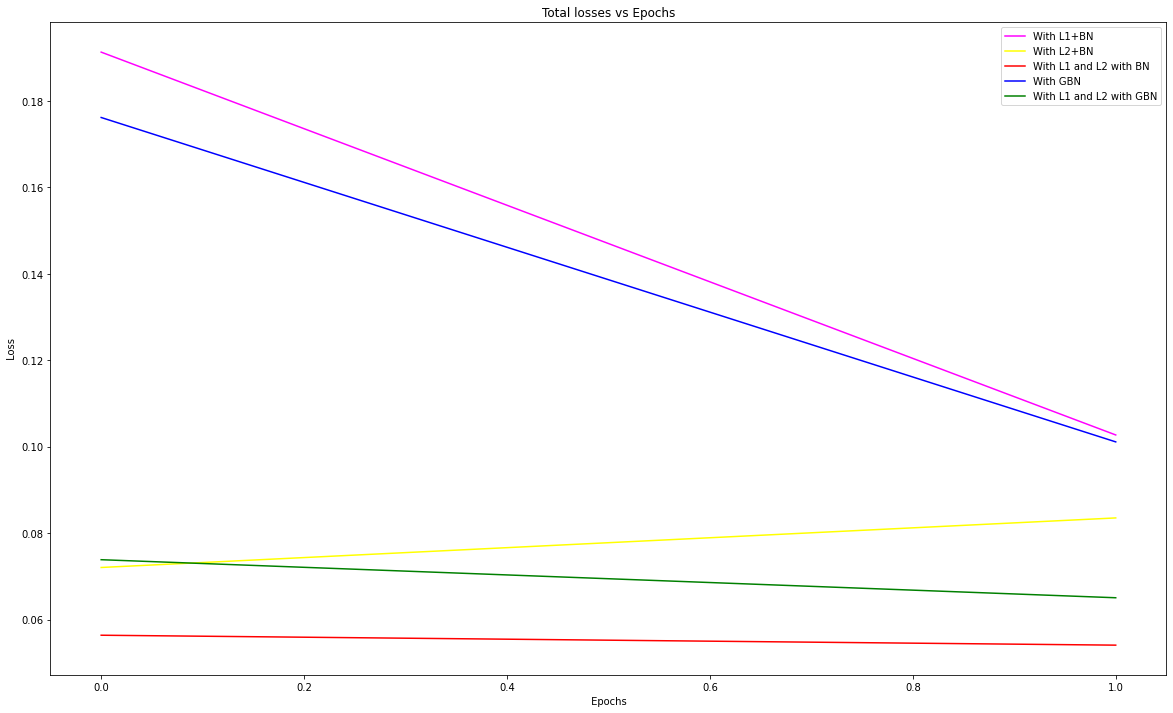

In [27]:
#Plot for Test Losses for Different Cases
plot_stat(total_test_losses, 'Loss')

[[97.35, 98.35], [98.8, 98.18], [98.83, 98.76], [97.59, 98.33], [98.55, 98.67]]


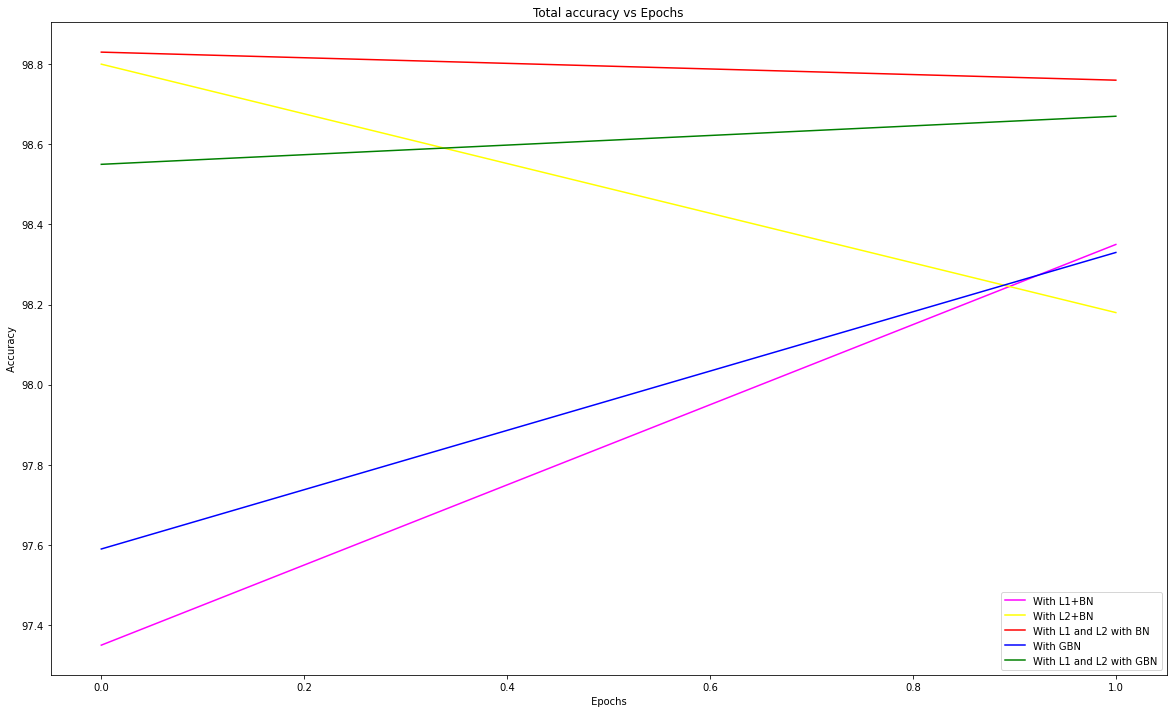

In [28]:
# Plot for Test accuracy for Different Cases
print(total_test_accuracies)
plot_stat(total_test_accuracies, 'Acc')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


IndexError: ignored

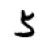

In [19]:
misclassified_image_finder(model, save_path_gbn, device, train_loader, EPOCHS, "Ghost Batch Normalization")

## Summary:

A simple DNN with Total params=7,612 was created and trained for 25 epochs with L1, L2 Regularization, Batch Normalization and Ghost Batch Normalization. 

Following are the accuracy observed:

> 1. with L1 + BN => **99.29%**
2. with L2 + BN => **99.31%**
3. with L1 and L2 with BN => **99.47%**
4. with GBN => **98.9%**
5. with L1 and L2 with GBN => **99.33%**

Reference:
* GBN:  https://github.com/apple/ml-cifar-10-faster/blob/master/utils.py

